Mount Drive on Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install necessary modules

Tensorflow for CNN model

openCV for viewing video

MTCNN for viewing faces from frames

In [ ]:
pip install tensorflow opencv-python-headless mtcnn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.3 MB/s eta 0:00:00


Import necessary modules

In [ ]:
import numpy as np # Linear Algebra
import tensorflow as tf # Python framework
from sklearn.model_selection import train_test_split # Training the model
import os # Accesing directories having images
import cv2 # Extracting features from images
from mtcnn import MTCNN # Face detection
#from PIL import image
import io

Loading Datasets

In [ ]:
def load_images_from_folder(folder, max_images=750, target_size=(224, 224)):
    """
    {
      This function loads images from a folder and resizes them to the specified target size

      Args :
          folder : The path to the folder containing the images
          max_images : The maximum number of images to load
          target_size : The target size of the resized images

      Returns :
          images : A list of resized images
    }
    """
    images = []
    for i, filename in enumerate(os.listdir(folder)):
        if i >= max_images:
            break
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)  # Resize image to target size
            images.append(img)
    return images

In [ ]:
# Function to load and preprocess dataset
def load_dataset(dataset_path, max_images_per_class=750, target_size=(224, 224)):
    """
    {
      This function loads real and fake images from the specified folder and labels them as real or fake

      Args :
          dataset_path : The path to the folder containing the images
          max_images_per_class : The maximum number of images per class
          target_size : The target size of the resized images

      Returns : Numpy arrays of images and labels
    }
    """
    # Load real and fake images
    real_images = load_images_from_folder(os.path.join(dataset_path, 'Real'), max_images=max_images_per_class, target_size=target_size)
    fake_images = load_images_from_folder(os.path.join(dataset_path, 'Fake'), max_images=max_images_per_class, target_size=target_size)

    real_labels = [0] * len(real_images)
    fake_labels = [1] * len(fake_images)

    images = real_images + fake_images
    labels = real_labels + fake_labels
    #print(np.array(images))
    #print(np.array(labels))
    return np.array(images), np.array(labels)

Loading Dataset from google drive

In [ ]:
dataset_path = '/content/drive/MyDrive/Dataset for Deepfake'
images, labels = load_dataset(dataset_path, max_images_per_class=750, target_size=(224, 224))

Test Train Split

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

Normalization of images

In [ ]:
# Function to preprocess images
def preprocess_images(images):
    """
    {
      This function resizes the pixels of the images in the range 0 to 1

      Args :
          images : The images to be resized

      Returns :
          image : normalised image with pixel size ranging from 0 to 1
    }
    """
    # Normalize pixel values to [0, 1]
    normalized_images = images / 255.0
    return normalized_images

In [ ]:
# Preprocess images
X_train_preprocessed = preprocess_images(X_train)
X_test_preprocessed = preprocess_images(X_test)

Building CNN model

In [ ]:
# Function to build CNN model
def build_model(input_shape):
    """
    {
      This function builds the CNN (Convulational Neural Networks) model

      Args :
          input_shape : The shape of the input images

      Returns :
          model : The CNN model
    }
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer: binary classification (real or fake)
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    return model

In [ ]:
# Build and train the model

input_shape = X_train_preprocessed[0].shape
model = build_model(input_shape)

hist = model.fit(X_train_preprocessed, y_train, epochs=10, batch_size=32, validation_data=(X_test_preprocessed, y_test))


Epoch 1/10
38/38 [==============================] - 14s 112ms/step - loss: 1.0581 - accuracy: 0.5658 - precision: 0.5758 - recall: 0.4782 - val_loss: 0.6220 - val_accuracy: 0.7267 - val_precision: 0.6875 - val_recall: 0.8571
Epoch 2/10
38/38 [==============================] - 2s 55ms/step - loss: 0.5488 - accuracy: 0.7333 - precision: 0.7404 - recall: 0.7131 - val_loss: 0.4292 - val_accuracy: 0.8300 - val_precision: 0.8872 - val_recall: 0.7662
Epoch 3/10
38/38 [==============================] - 2s 62ms/step - loss: 0.4230 - accuracy: 0.8158 - precision: 0.8194 - recall: 0.8070 - val_loss: 0.4437 - val_accuracy: 0.8033 - val_precision: 0.9204 - val_recall: 0.6753
Epoch 4/10
38/38 [==============================] - 2s 62ms/step - loss: 0.3863 - accuracy: 0.8242 - precision: 0.8371 - recall: 0.8020 - val_loss: 0.4322 - val_accuracy: 0.8200 - val_precision: 0.9167 - val_recall: 0.7143
Epoch 5/10
38/38 [==============================] - 3s 68ms/step - loss: 0.3191 - accuracy: 0.8708 - preci

'\n# Build and train the model\ninput_shape = X_train_preprocessed[0].shape\nmodel = build_model(input_shape)\ntrain_generator = flow(X_train_preprocessed, y_train, batch_size=32)\nmodel.fit(train_generator, epochs=10, validation_data=(X_test_preprocessed, y_test))\n'

Result Analysis

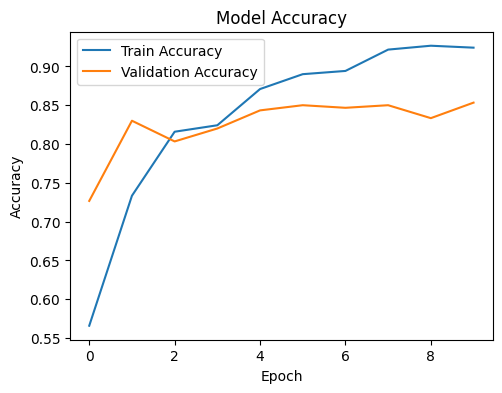

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')


The Graph above shows :

Train Accuracy (blue): This line shows how the accuracy of the model on the training data evolves over the epochs.

Validation Accuracy (orange): This line shows how the accuracy of the model on the validation data evolves over the epochs.

Both training and validation accuracy are increasing and plateauing, it suggests the model is learning well and converging.

10/10 [==============================] - 0s 25ms/step


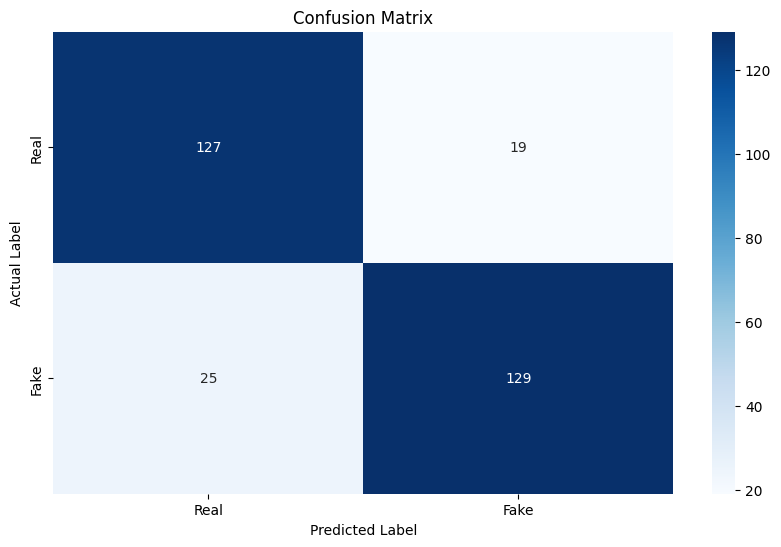

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = (model.predict(X_test_preprocessed) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Get classification report
report = classification_report(y_test, y_pred)

# Print classification report
print(report)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       146
           1       0.87      0.84      0.85       154

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



### Metrics Explanation:

#### Class 0 (Real)
- **Precision (0.84)**: Of all the images predicted as real, 84% were actually real.
- **Recall (0.87)**: Of all the real images, 87% were correctly identified as real.
- **F1-Score (0.85)**: The harmonic mean of precision and recall, providing a single metric that balances both. This indicates a good balance between precision and recall for real images.
- **Support (146)**: The number of true instances of the real class in the test set.

#### Class 1 (Fake)
- **Precision (0.87)**: Of all the images predicted as fake, 87% were actually fake.
- **Recall (0.84)**: Of all the fake images, 84% were correctly identified as fake.
- **F1-Score (0.85)**: The harmonic mean of precision and recall for fake images.
- **Support (154)**: The number of true instances of the fake class in the test set.

### Overall Metrics:
- **Accuracy (0.85)**: The ratio of correctly predicted observations to the total observations. An accuracy of 85% means the model correctly classified 85% of the images in the test set.
- **Macro Average (0.85)**: The unweighted average of precision, recall, and F1-score for both classes. It treats all classes equally without considering their support.
- **Weighted Average (0.85)**: The average of precision, recall, and F1-score, weighted by the number of true instances for each class. It takes class imbalance into account.

### Interpretation:
- **Balanced Performance**: The precision, recall, and F1-scores are quite balanced between the two classes, indicating that the model performs similarly well for both real and fake images.
- **High Accuracy**: An accuracy of 85% is a strong performance metric, suggesting that the model is generally reliable.
- **Good Precision and Recall**: Both precision and recall are high for both classes, indicating that the model is good at correctly identifying both real and fake images while minimizing false positives and false negatives.

10/10 [==============================] - 0s 19ms/step


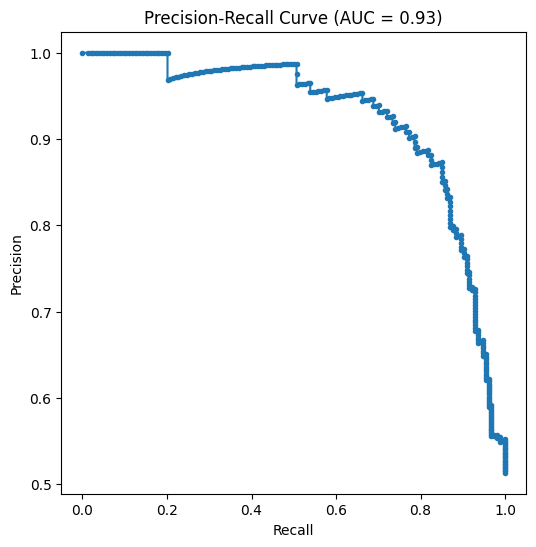

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Get scores
y_scores = model.predict(X_test_preprocessed)

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, marker='.')
plt.title(f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


Precision-Recall Curve and AUC

Precision: The proportion of true positive results in the predicted positives
(i.e., how many of the predicted deepfakes are actually deepfakes).

Recall (Sensitivity): The proportion of true positive results in all actual positives (i.e., how many of the actual deepfakes were correctly identified by the model).

AUC (Area Under the Curve):
AUC = 0.93: indicates that the model has a high performance in distinguishing between the classes.An AUC of 0.93 suggests that the model is very good at identifying true positives while maintaining a low rate of false positives

In [ ]:
# Evaluate the model
"""
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test)
print("Test Accuracy:", test_accuracy)
"""
# Evaluate the model
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test_preprocessed, y_test)
#test_loss, test_accuracy, test_precision, test_recall = evaluation_results
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")

10/10 [==============================] - 0s 25ms/step - loss: 0.4667 - accuracy: 0.8533 - precision: 0.8716 - recall: 0.8377
Test Accuracy: 0.8533333539962769
Test Precision: 0.8716216087341309
Test Recall: 0.8376623392105103


Carrying out predicitions of the video and image

In [ ]:
# Function to predict if an image is real or fake
def predict_image(image, model):
    """
    {
      This function predicts if an image is real or fake

      Args :
          image_path : The path to the image to be predicted
          model : The trained CNN model

      Returns :
          prediction : The predicted class (real or fake)
    }
    """
    img = cv2.resize(image, (224, 224))  # Resize image to target size
    img = preprocess_images(np.array([img]))
    prediction = model.predict(img)
    return "Real" if prediction[0][0] < 0.5 else "Deepfake"

In [ ]:
def detect_faces_in_video(video_path, output_path, model):
  """
  Detect faces in a video and save the detected frames to a new video file.

  Args:
    video_path (str): Path to the input video file.
    output_path (str): Path to the output directory where the detected frames will be saved.
    model (tf.keras.Model): Trained CNN model.

  Returns:
    str: The predicted class (real or deepfake) of the video.
  """
  detector = MTCNN()
  cap = cv2.VideoCapture(video_path)
  frame_count = 0
  detected_faces = []
  frame_predictions = []

  while cap.isOpened() and len(detected_faces) < 10:
    print(f"Frame {frame_count}")
    ret, frame = cap.read()
    if not ret:
      break

    frame_count += 1

    # Detect faces in the frame
    faces = detector.detect_faces(frame)

    if faces:
      # Extract the bounding box for the first detected face
      x, y, width, height = faces[0]['box']
      x, y, abs(x), abs(y)

      # Extract the frame from the face
      face = frame[y:y+height, x:x+width]
      frame_prediction = predict_image(face, model)
      frame_predictions.append(frame_prediction)
      detected_faces.append(frame)

  cap.release()

  if detected_faces:
    # Save the detected frames to a video file
    height, width, layers = detected_faces[0].shape
    size = (width, height)
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), 15, size)

    for frame in detected_faces:
      out.write(frame)
    out.release()

    # Aggregate Predictions
    real_count = frame_predictions.count('Real')
    deepfake_count = frame_predictions.count('Deepfake')
    result = "Real" if real_count > deepfake_count else "Deepfake"
    return result

  else:
    return "No face detected in the video."

In [ ]:
def predict_for_image(image, model):
    # Read the image from the file path
    img = cv2.imread(image)
    if img is None:
        raise ValueError("Image not found or the path is incorrect.")
    # Resize image to target size
    img = cv2.resize(img, (224, 224))
    # Preprocess image
    img = preprocess_images(np.array([img]))
    # Predict
    prediction = model.predict(img)
    return "Real" if prediction[0][0] < 0.5 else "Deepfake"

In [ ]:
from PIL import Image
import io

def convert_to_jpg(image_path):
    image = Image.open(image_path)
    if image.format not in ['JPEG', 'JPG']:
        image = image.convert('RGB')
        output = io.BytesIO()
        image.save(output, format="JPEG")
        output.seek(0)
        image = Image.open(output)
    return image

In [ ]:

# Example usage: Predict if an image is real or deepfake
image_path = '/content/vecteezy_ai-generated-portrait-of-professional-teacher-on-transparent_39612040.png'  # Update with your image path
convert = convert_to_jpg(image_path)
image = np.array(convert)
prediction = predict_for_image(image_path, model)
print("Prediction:", prediction)

1/1 [==============================] - 0s 32ms/step
Prediction: Deepfake


In [ ]:
video_path = r"/content/drive/MyDrive/TestReal.mp4"
output_path = r"/content/drive/MyDrive/DataSet for Deepfake"
result = detect_faces_in_video(video_path, output_path, model)
print(result)

Frame 0
1/1 [==============================] - 0s 152ms/step
Frame 1
1/1 [==============================] - 0s 18ms/step
Frame 2
1/1 [==============================] - 0s 18ms/step
Frame 3
1/1 [==============================] - 0s 17ms/step
Frame 4
1/1 [==============================] - 0s 26ms/step
Frame 5
1/1 [==============================] - 0s 25ms/step
Frame 6
1/1 [==============================] - 0s 30ms/step
Frame 7
1/1 [==============================] - 0s 17ms/step
Frame 8
1/1 [==============================] - 0s 18ms/step
Frame 9
1/1 [==============================] - 0s 17ms/step
Real


In [ ]:
model.save("Streamlit_Application_for_DeepFake.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
